In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import lazypredict
import matplotlib.pyplot as plt
import numpy as np

train_=pd.read_csv("C:/Users/pfali/Downloads/playground-series-s3e22/train.csv")
test_=pd.read_csv("C:/Users/pfali/Downloads/playground-series-s3e22/test.csv")


In [2]:
train_df=train_.copy()
test_df=test_.copy()

In [3]:
train_df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [4]:
pd.set_option('display.max_columns',None)
train_df.describe(include='all')

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
count,1235.0000,1235,1235,1.235000e+03,1235.000000,1235.000000,1235.000000,1196,1175,1214,1229,1191,1215,1212,1155,1214,1235.000000,1045,1022,1235.000000,1235.000000,1187,1235.000000,1235,1235.000000,1235.000000,1235.000000,1235,1235
unique,NaN,2,2,NaN,NaN,NaN,NaN,4,4,6,3,6,5,4,3,4,NaN,5,5,NaN,NaN,3,NaN,2,NaN,NaN,NaN,2,3
top,NaN,yes,adult,NaN,NaN,NaN,NaN,cool,reduced,pale_pink,less_3_sec,depressed,hypomotile,moderate,slight,more_1_liter,NaN,absent,distend_small,NaN,NaN,serosanguious,NaN,yes,NaN,NaN,NaN,yes,lived
freq,NaN,887,1160,NaN,NaN,NaN,NaN,700,724,284,834,429,664,543,758,604,NaN,493,482,NaN,NaN,570,NaN,929,NaN,NaN,NaN,668,574
mean,617.0000,NaN,NaN,9.545004e+05,38.202186,79.574089,30.054251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.382591,NaN,NaN,49.602429,21.388016,NaN,3.290931,NaN,3832.496356,14.612146,3.577328,NaN,NaN
std,356.6581,NaN,NaN,1.356403e+06,0.788668,29.108638,16.452066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.937357,NaN,NaN,10.535800,26.676453,NaN,1.589195,NaN,5436.733774,193.705735,88.858953,NaN,NaN
min,0.0000,NaN,NaN,5.213990e+05,35.400000,30.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,23.000000,3.500000,NaN,0.100000,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,308.5000,NaN,NaN,5.288000e+05,37.800000,53.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,43.000000,6.600000,NaN,2.000000,NaN,2205.000000,0.000000,0.000000,NaN,NaN
50%,617.0000,NaN,NaN,5.297770e+05,38.200000,76.000000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,NaN,NaN,48.000000,7.500000,NaN,3.000000,NaN,2209.000000,0.000000,0.000000,NaN,NaN
75%,925.5000,NaN,NaN,5.341450e+05,38.600000,100.000000,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,57.000000,9.100000,NaN,4.300000,NaN,3205.000000,0.000000,0.000000,NaN,NaN


In [5]:
train_df.isnull().sum()

id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64

In [6]:
test_df.isnull().sum()

id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       35
peripheral_pulse          47
mucous_membrane           13
capillary_refill_time      6
pain                      29
peristalsis               19
abdominal_distention      22
nasogastric_tube          64
nasogastric_reflux        14
nasogastric_reflux_ph      0
rectal_exam_feces        125
abdomen                  154
packed_cell_volume         0
total_protein              0
abdomo_appearance         31
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [7]:
train_df.dtypes

id                         int64
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
outcome                   object
dtype: object

In [8]:
train_df['surgery'].replace(['yes','no'],[0,1],inplace=True)
train_df['age'].replace(['adult','young'],[0,1],inplace=True)
train_df['temp_of_extremities'].replace(['cold','cool','None','normal','warm'],[1,2,0,3,4],inplace=True)
train_df['peripheral_pulse'].replace(['reduced','increased','None','normal','absent'],[1,2,0,3,4],inplace=True)
train_df['mucous_membrane'].replace(['bright_pink','bright_red','None','dark_cyanotic','normal_pink','pale_pink','pale_cyanotic'],[1,2,0,3,4,5,6],inplace=True)
train_df['capillary_refill_time'].replace(['3','more_3_sec','None','less_3_sec'],[1,2,0,3],inplace=True)
train_df['pain'].replace(['alert','depressed','None','extreme_pain','mild_pain','severe_pain','slight'],[1,2,0,3,4,5,6],inplace=True)
train_df['peristalsis'].replace(['absent','normal','None','distend_small','hypomotile','hypermotile'],[1,2,0,3,4,5],inplace=True)
train_df['abdominal_distention'].replace(['slight','moderate','None','none','severe'],[1,2,0,3,4],inplace=True)
train_df['nasogastric_tube'].replace(['slight','none','None','significant'],[1,2,0,3],inplace=True)
train_df['nasogastric_reflux'].replace(['slight','none','None','less_1_liter','more_1_liter'],[1,2,0,3,4],inplace=True)
train_df['rectal_exam_feces'].replace(['absent','decreased','None','increased','normal','serosanguious'],[1,2,0,3,4,5],inplace=True)
train_df['abdomen'].replace(['distend_large','distend_small','None','firm','normal','other'],[1,2,0,3,4,5],inplace=True)
train_df['abdomo_appearance'].replace(['clear','cloudy','None','serosanguious'],[1,2,0,3],inplace=True)
train_df['surgical_lesion'].replace(['yes','no'],[0,1],inplace=True)
train_df['cp_data'].replace(['yes','no'],[0,1],inplace=True)
train_df['outcome'].replace(['died','euthanized','lived'],[1,2,0],inplace=True)

In [9]:
train_df.dtypes

id                         int64
surgery                    int64
age                        int64
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities      float64
peripheral_pulse         float64
mucous_membrane          float64
capillary_refill_time    float64
pain                     float64
peristalsis              float64
abdominal_distention     float64
nasogastric_tube         float64
nasogastric_reflux       float64
nasogastric_reflux_ph    float64
rectal_exam_feces        float64
abdomen                  float64
packed_cell_volume       float64
total_protein            float64
abdomo_appearance        float64
abdomo_protein           float64
surgical_lesion            int64
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                    int64
outcome                    int64
dtype: object

In [10]:
train_df.drop(columns=['hospital_number'],inplace=True)
test_df.drop(columns=['hospital_number'],inplace=True)

In [11]:
features=train_df.columns.tolist()
features.remove('id')
features.remove('outcome')

In [12]:
print(features)

['surgery', 'age', 'rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein', 'abdomo_appearance', 'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3', 'cp_data']


C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

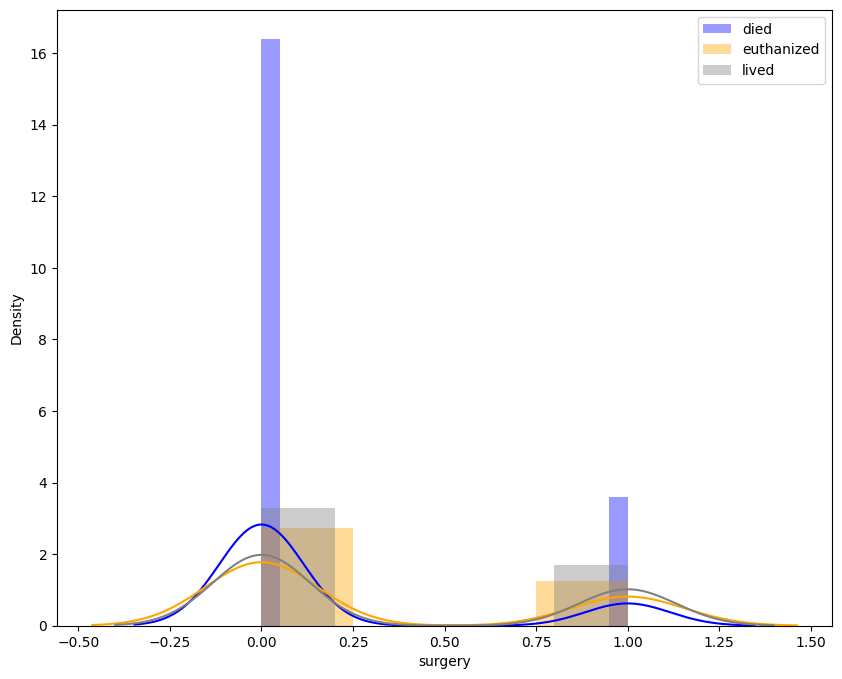

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

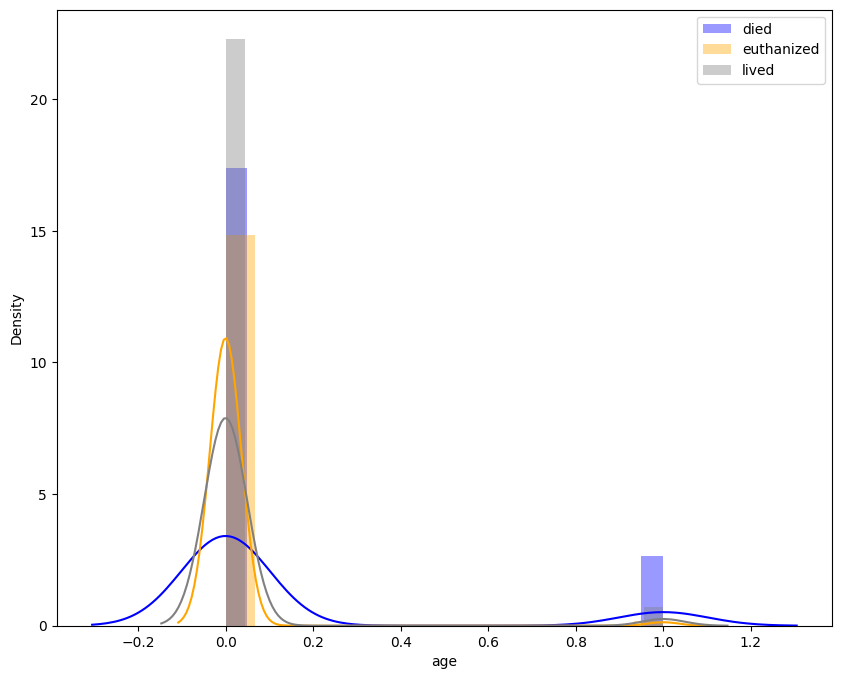

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

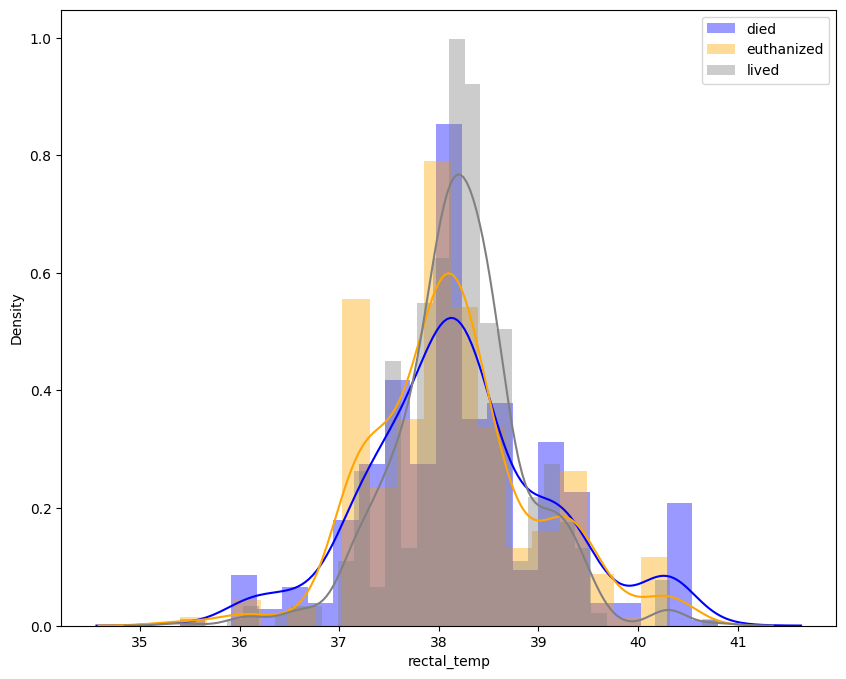

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

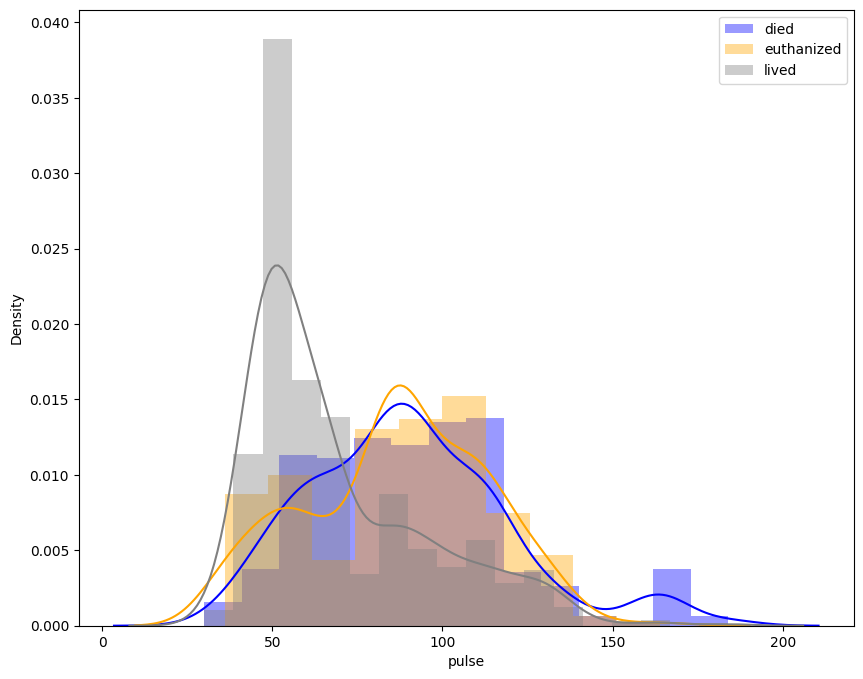

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

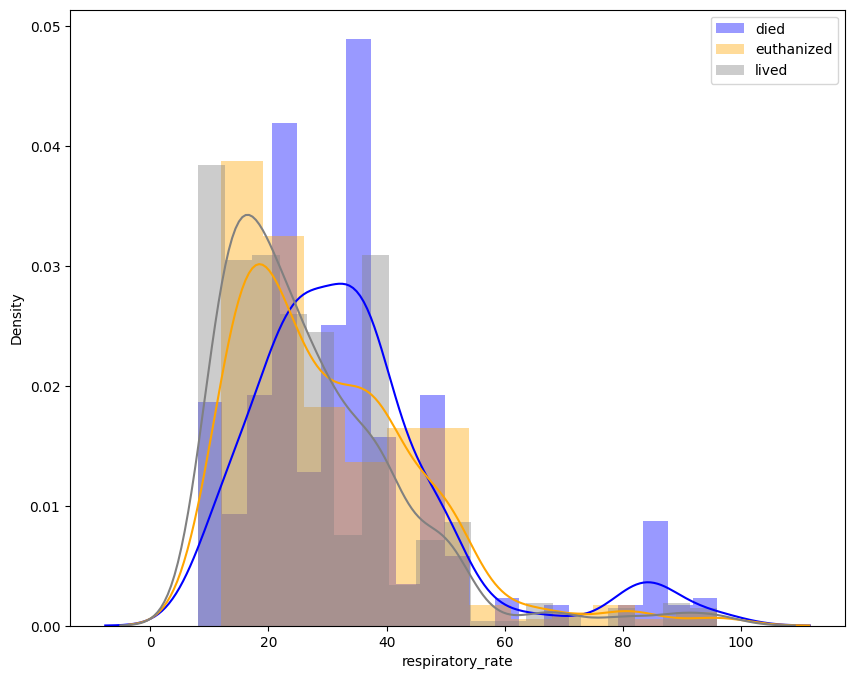

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

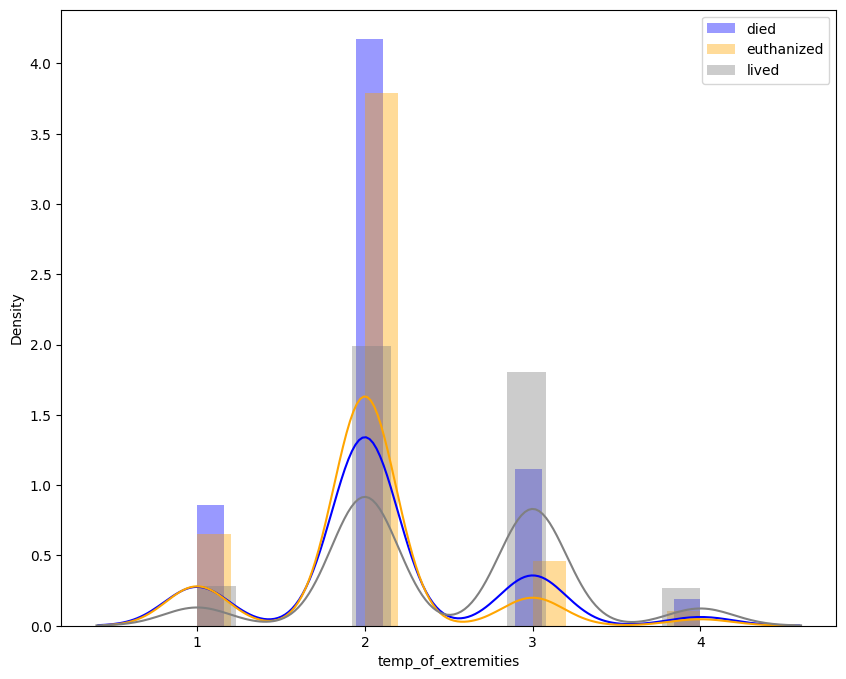

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

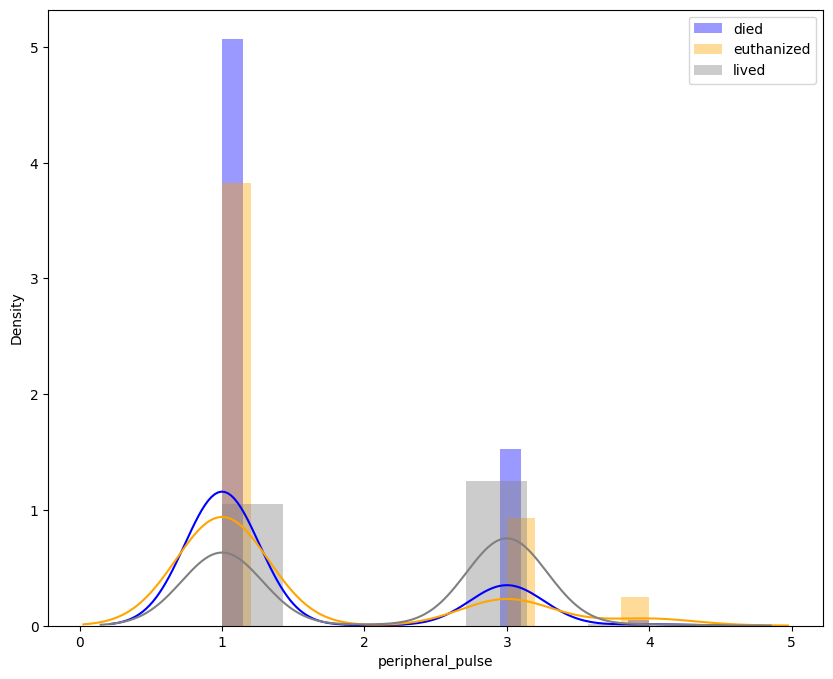

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

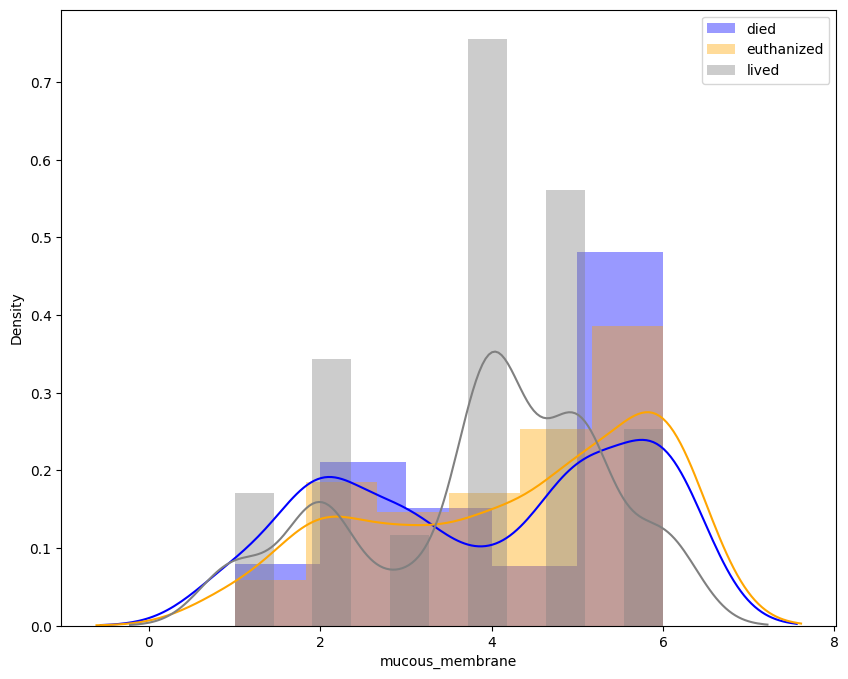

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

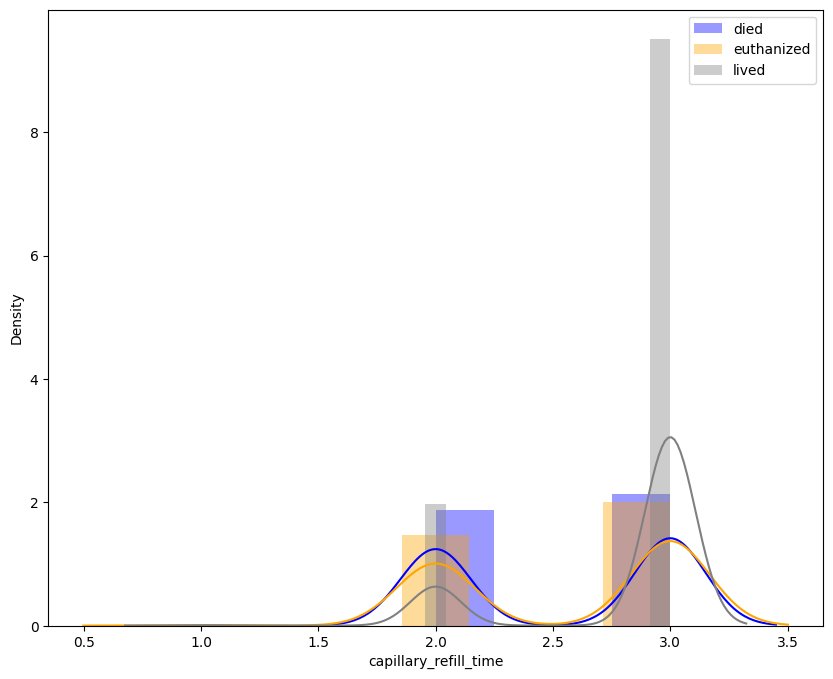

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

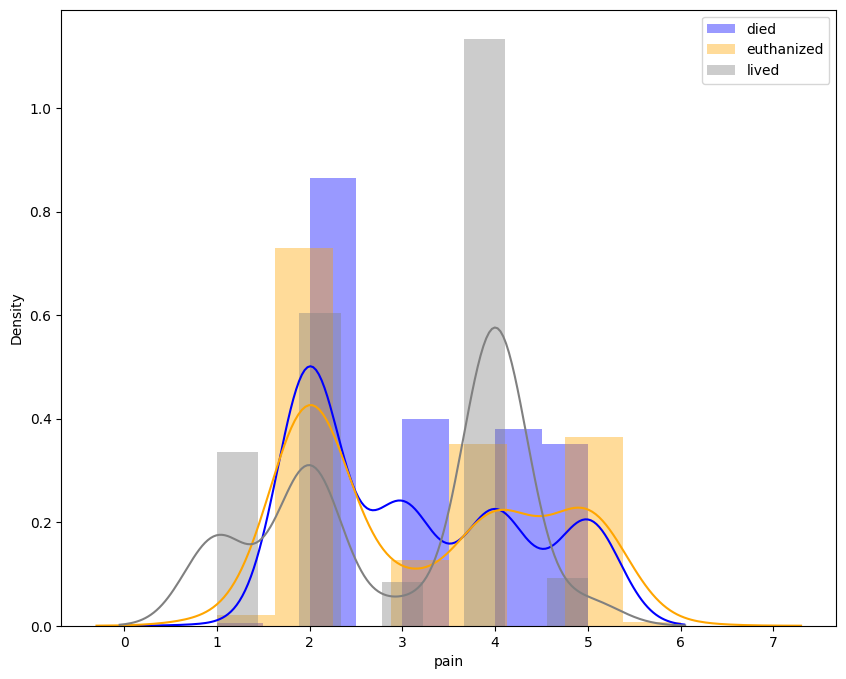

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

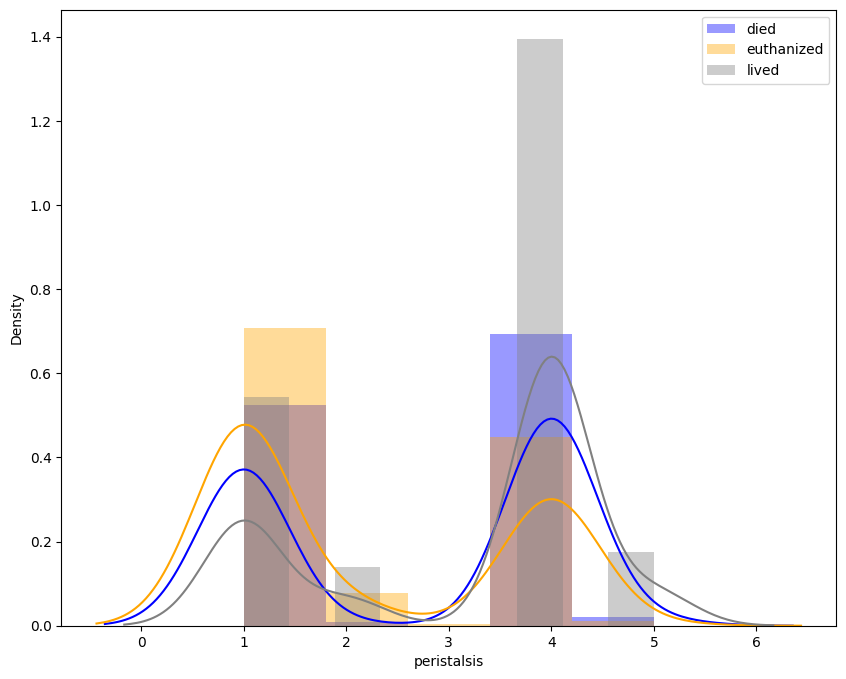

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

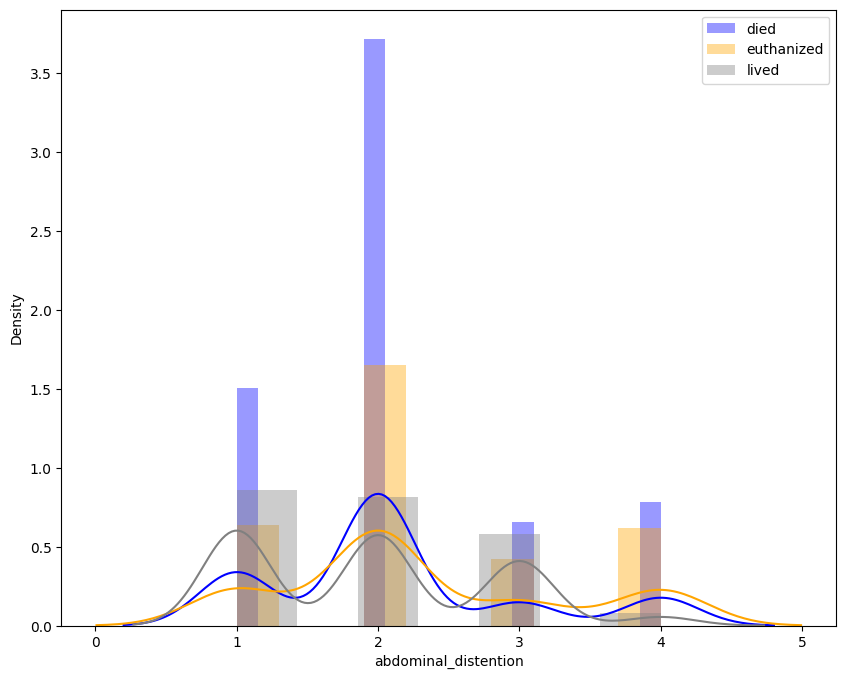

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

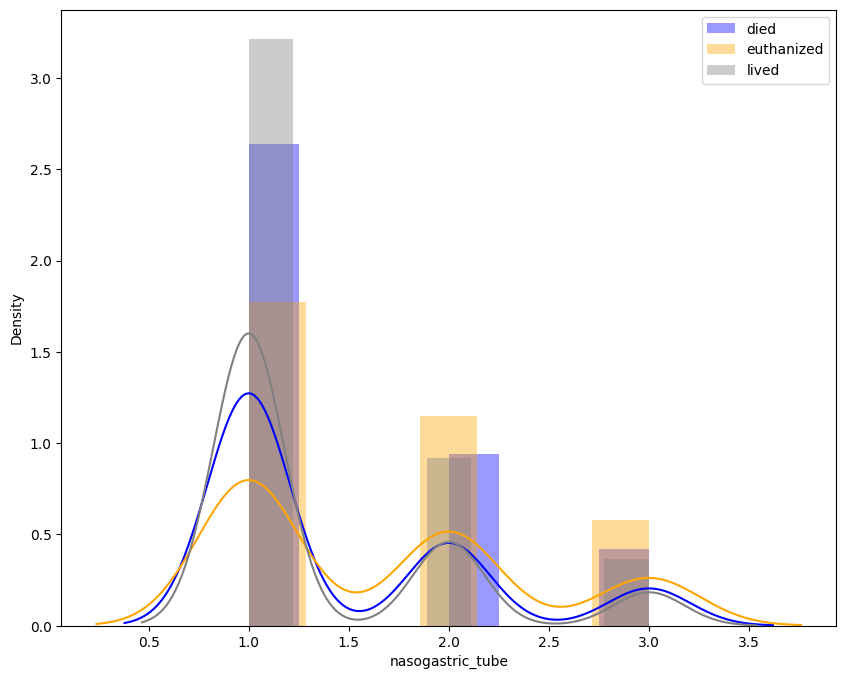

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

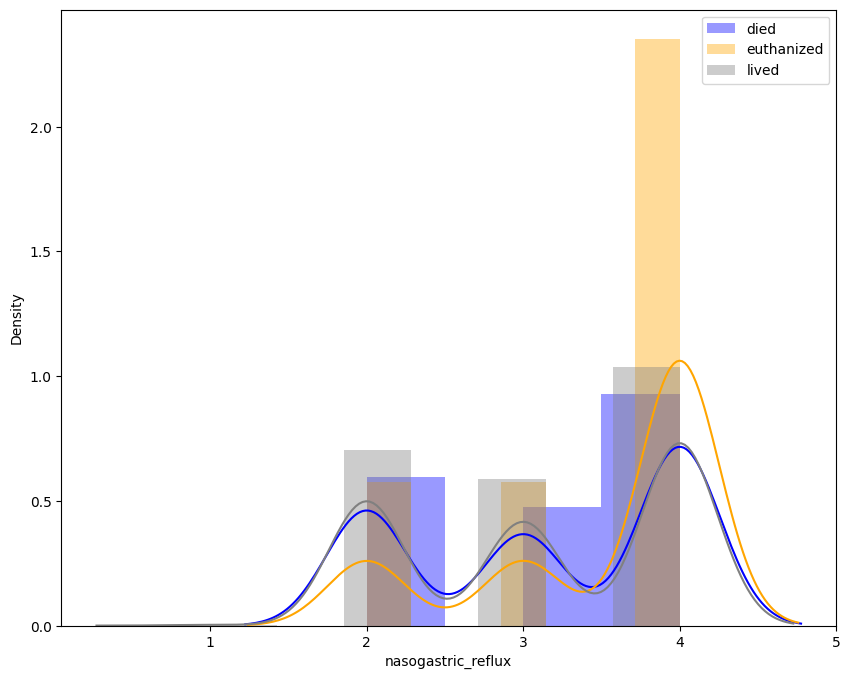

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

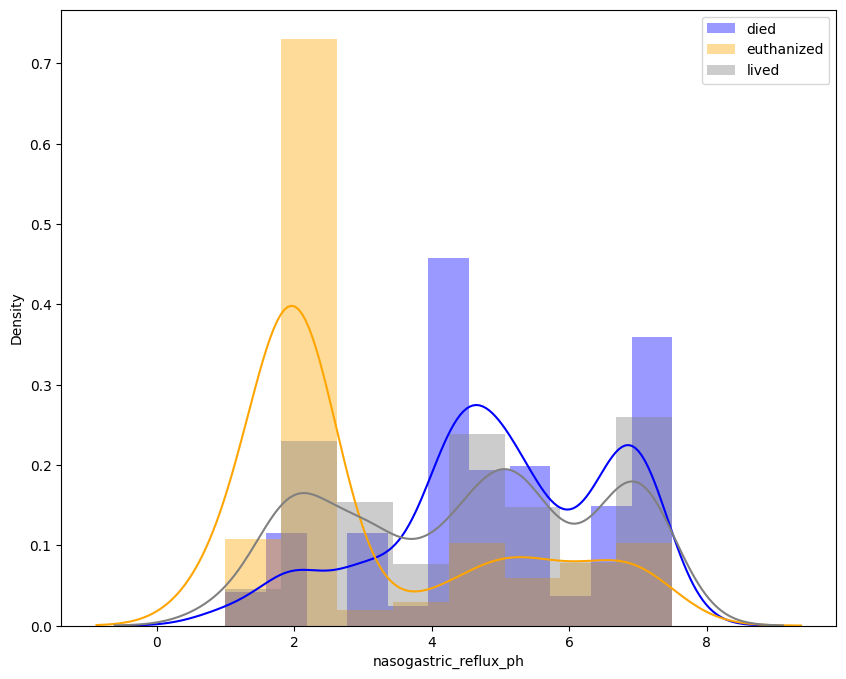

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

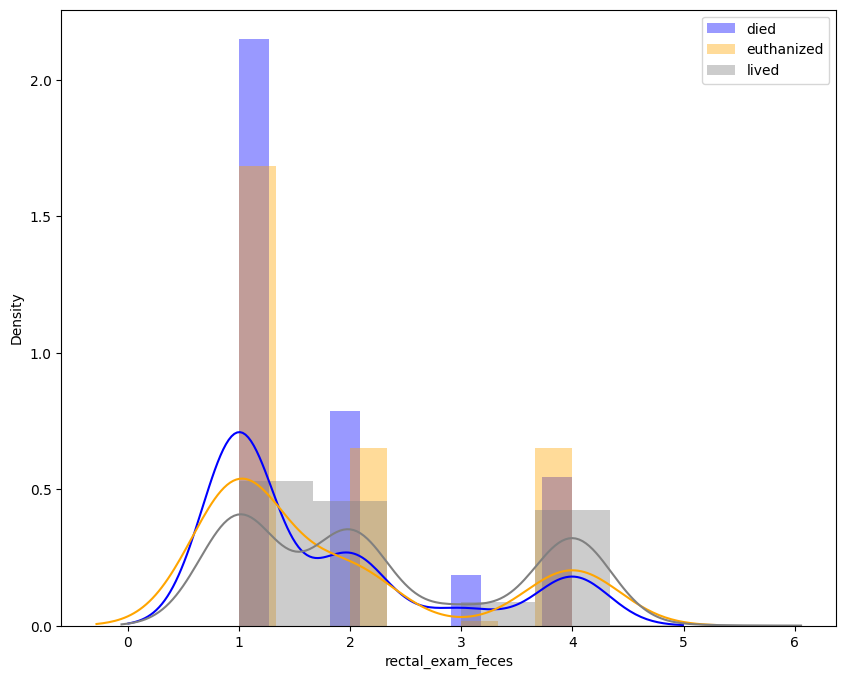

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

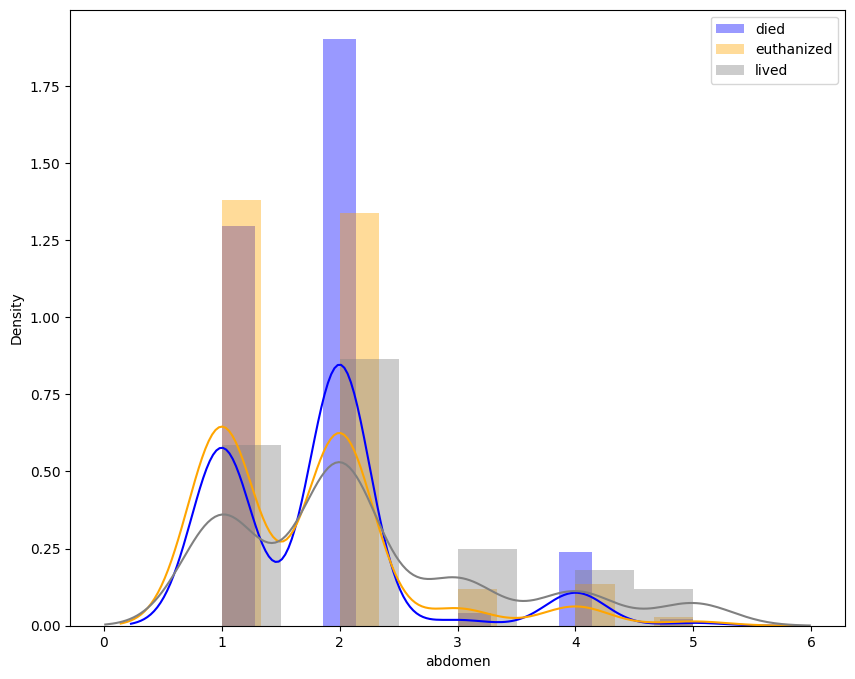

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

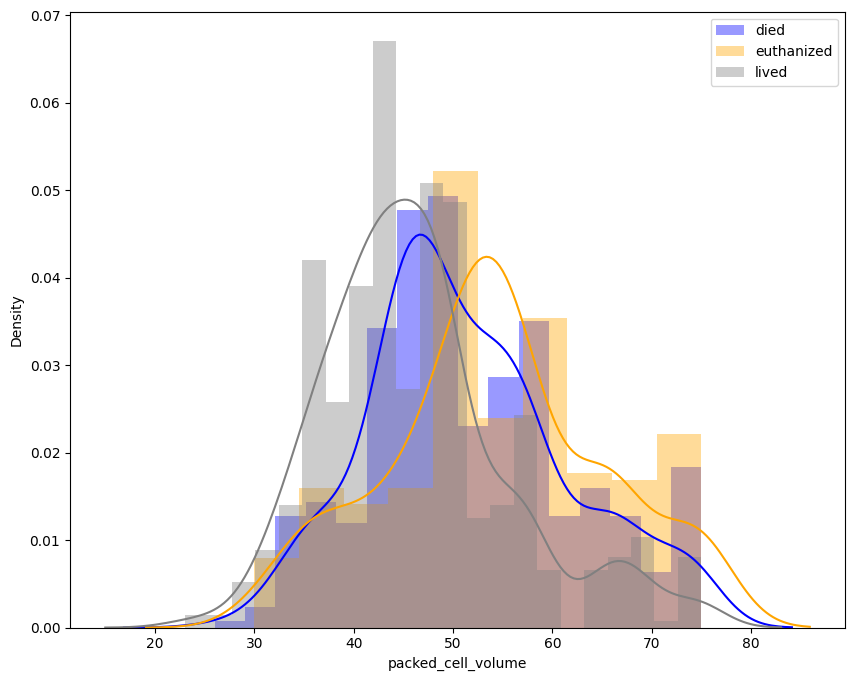

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

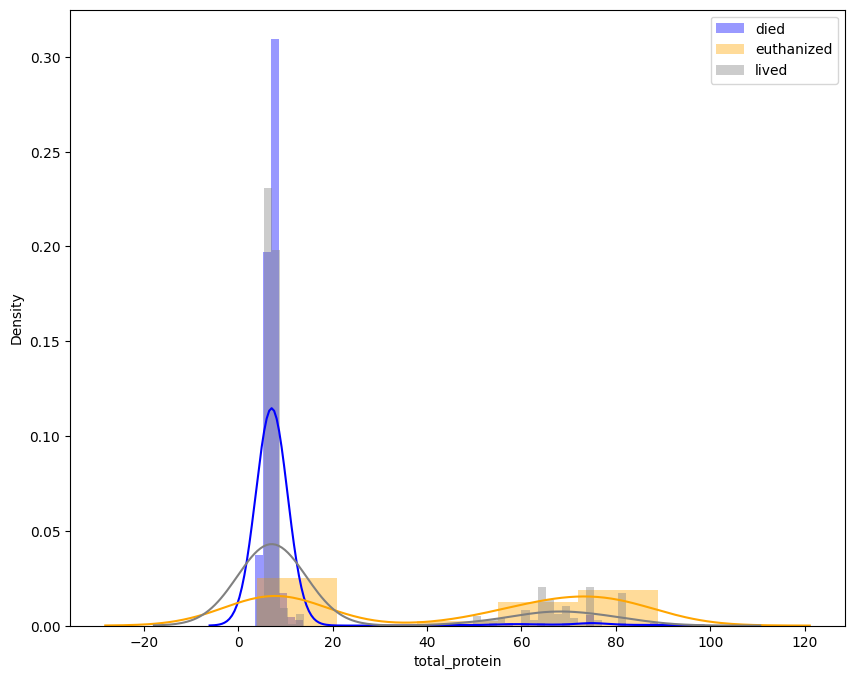

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

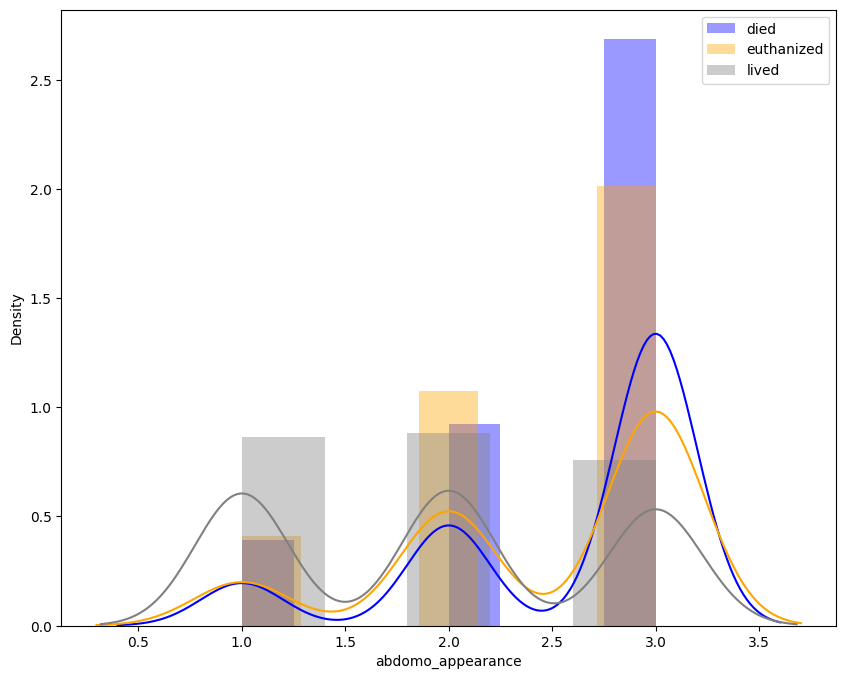

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

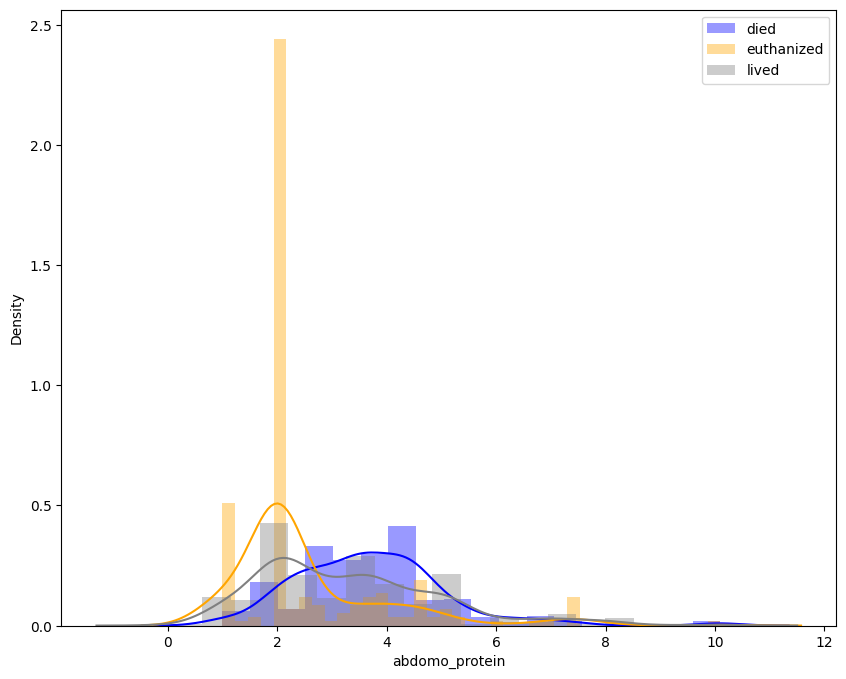

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

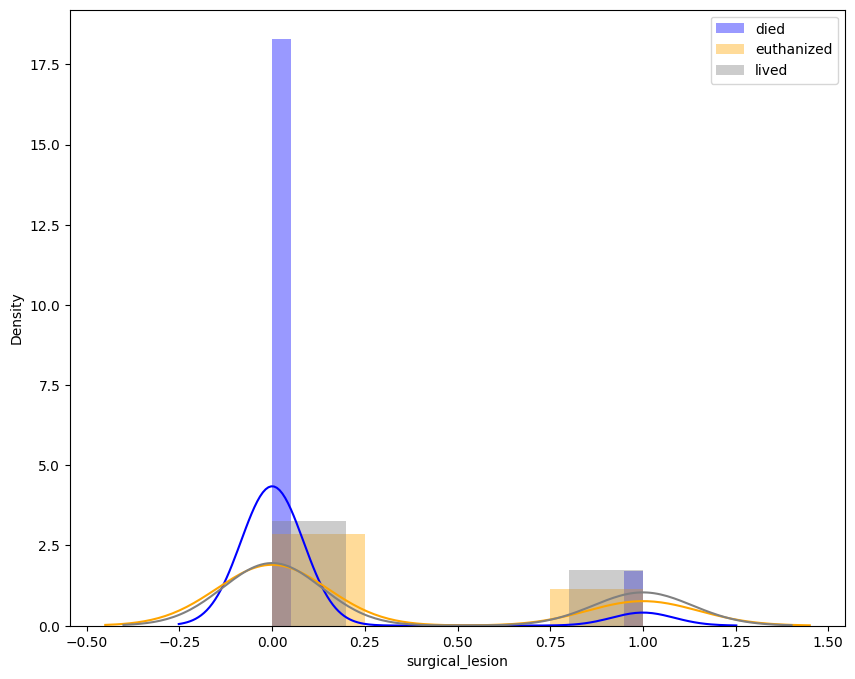

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

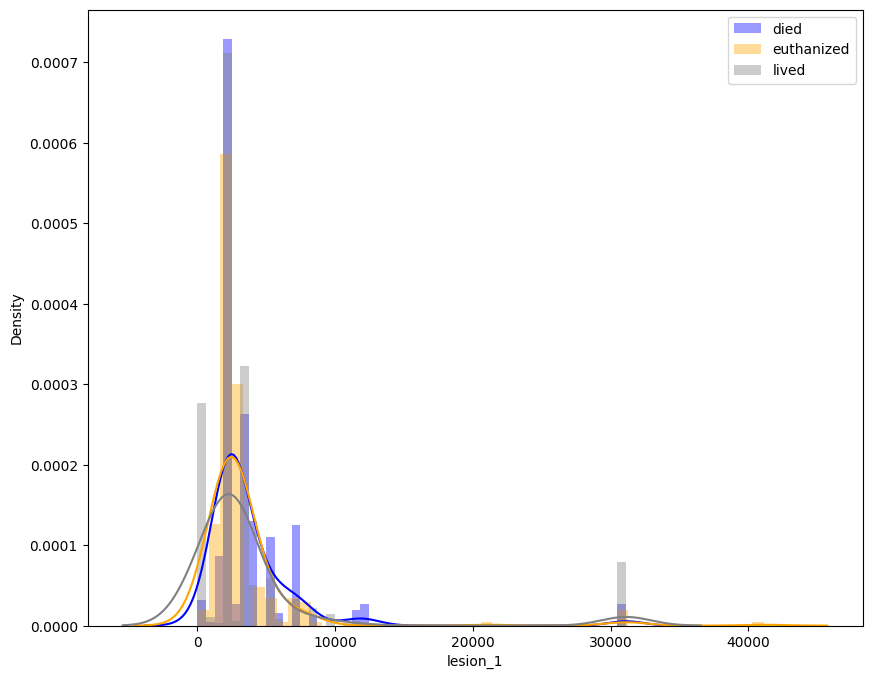

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to u

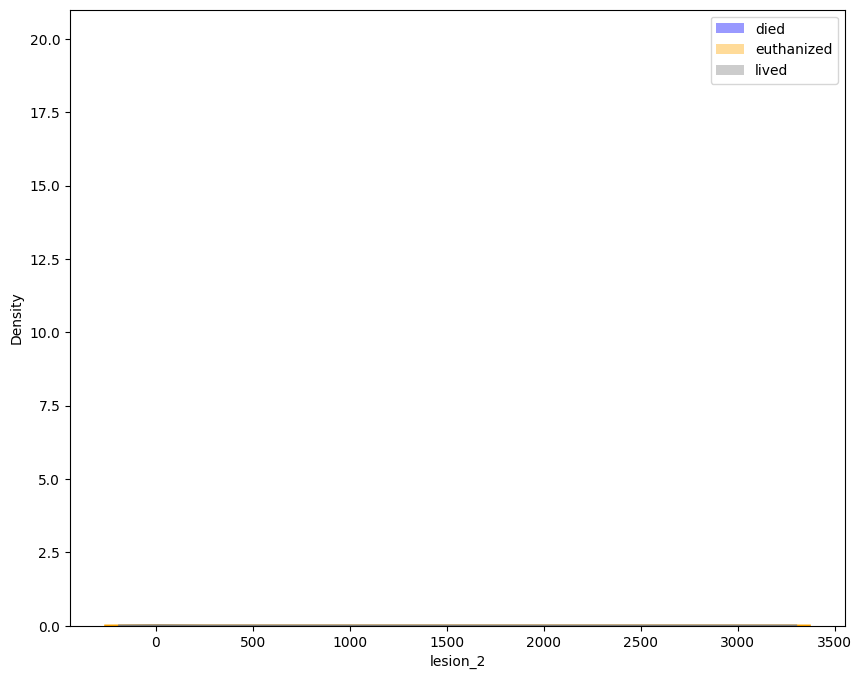

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to u

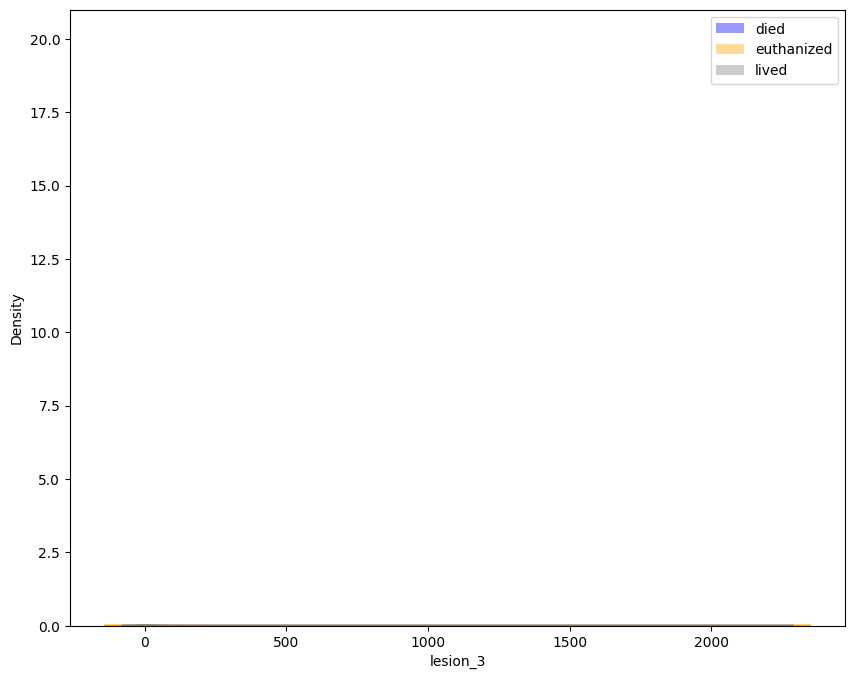

C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
C:\Users\pfali\AppData\Local\Temp\ipykernel_16888\1720292485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

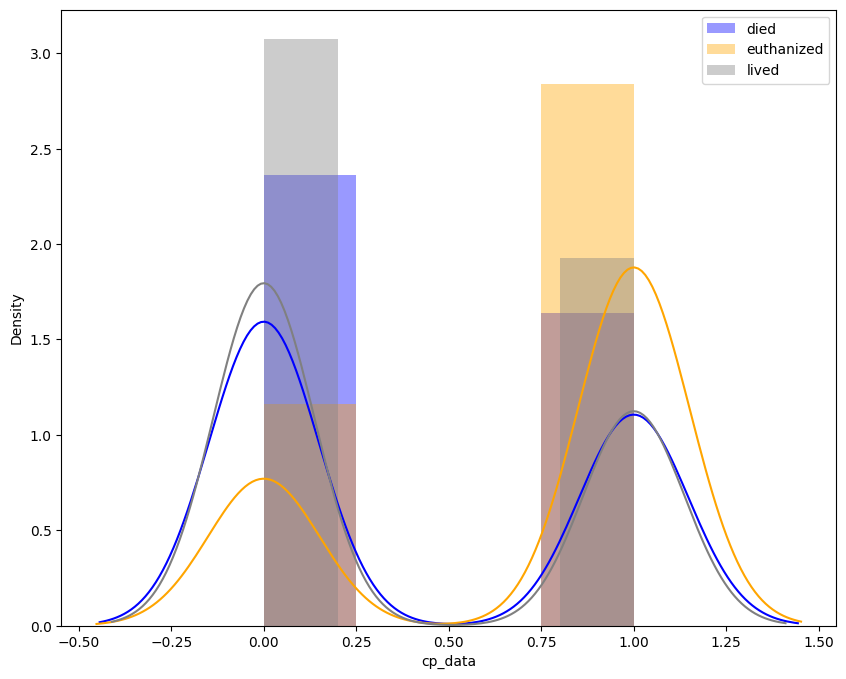

In [13]:
for feature in features:
    plt.figure(figsize=(10,8))
    sns.distplot(train_df.loc[train_df['outcome']==1,feature],kde=True,color='blue',label='died')
    sns.distplot(train_df.loc[train_df['outcome']==2,feature],kde=True,color='orange',label='euthanized')
    sns.distplot(train_df.loc[train_df['outcome']==0,feature],kde=True,color='grey',label='lived')
    plt.legend(loc='upper right')
    plt.show()

It seems that the most correlated features are 'pain', 'mucous_membrane', 'nasogastric_reflux_ph', 'abdomo_protein". We will leave only those features for our model.

In [14]:
train_df.drop(columns=['surgery', 'age', 'rectal_temp', 'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse', 'capillary_refill_time', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'total_protein', 'abdomo_appearance', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3', 'cp_data'], inplace=True)

In [15]:
f_list=train_df.columns.tolist()
f_list.remove('id')

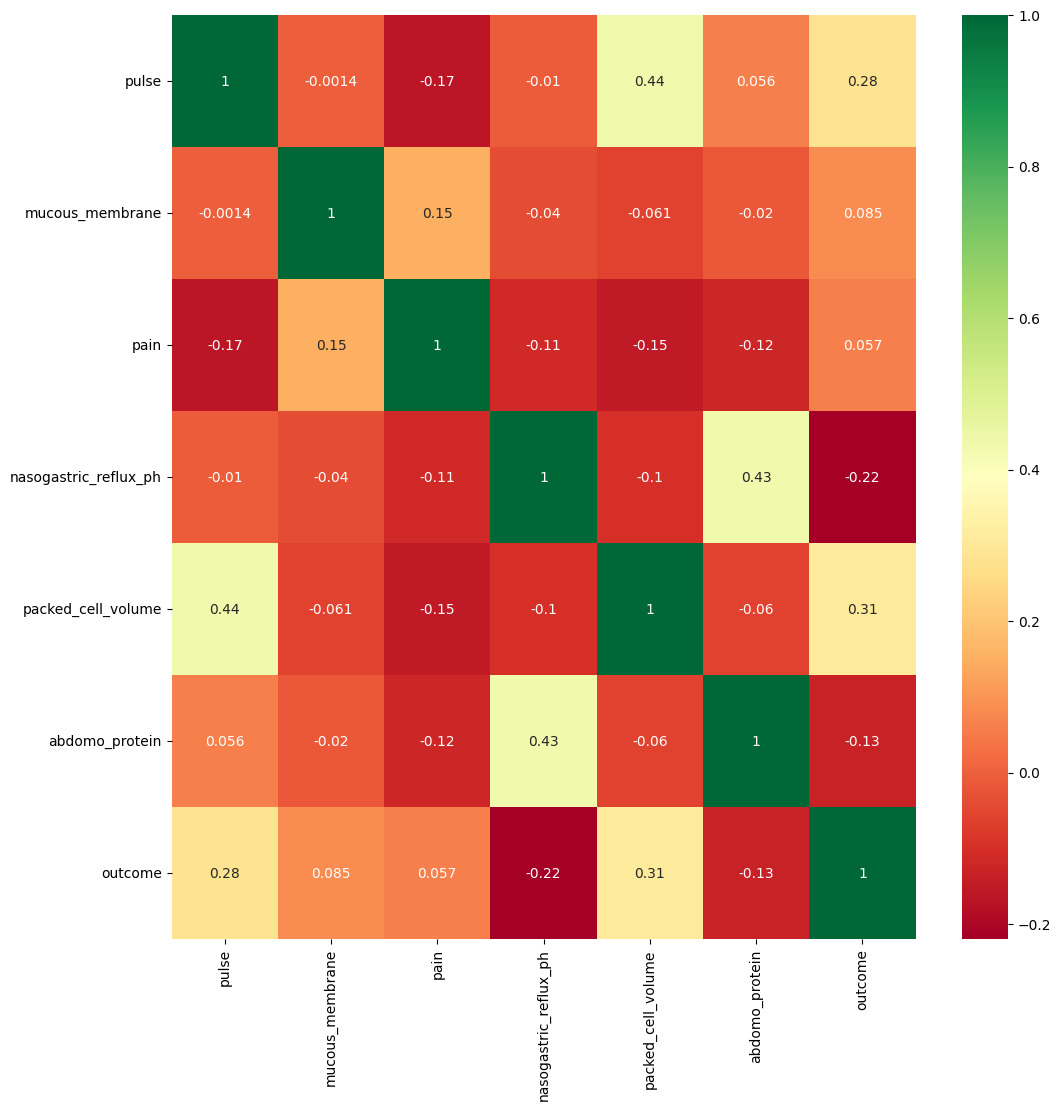

In [16]:
plt.figure(figsize=(12,12))
ax=sns.heatmap(train_df[f_list].corr(),xticklabels=train_df[f_list].corr().columns,yticklabels=train_df[f_list].corr().columns,cmap='RdYlGn',annot=True)
plt.show()

In [17]:
train_2=train_.copy()
test_2=test_.copy()

In [18]:
train_.drop(columns=['hospital_number','surgery', 'age', 'rectal_temp', 'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse', 'capillary_refill_time', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'total_protein', 'abdomo_appearance', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3', 'cp_data'], inplace=True)
test_.drop(columns=['hospital_number','surgery', 'age', 'rectal_temp', 'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse', 'capillary_refill_time', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'total_protein', 'abdomo_appearance', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3', 'cp_data'], inplace=True)

In [19]:
missing=['pain','mucous_membrane','nasogastric_reflux_ph']
for m in missing:
    train_[m]=train_[m].fillna(train_[m].mode()[0])
for n in missing:
    test_[n]=test_[n].fillna(test_[n].mode()[0])

In [20]:
train_.isnull().sum()

id                       0
pulse                    0
mucous_membrane          0
pain                     0
nasogastric_reflux_ph    0
packed_cell_volume       0
abdomo_protein           0
outcome                  0
dtype: int64

In [21]:
test_.isnull().sum()

id                       0
pulse                    0
mucous_membrane          0
pain                     0
nasogastric_reflux_ph    0
packed_cell_volume       0
abdomo_protein           0
dtype: int64

In [22]:
train=pd.get_dummies(train_, columns=['pain','mucous_membrane'],dtype='int64')
train['outcome'].replace(['died','euthanized','lived'],[1,2,3],inplace=True)
test=pd.get_dummies(test_, columns=['pain','mucous_membrane'],dtype='int64')

In [23]:
train.describe(include='all')

,id,pulse,nasogastric_reflux_ph,packed_cell_volume,abdomo_protein,outcome,pain_alert,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,pain_slight,mucous_membrane_bright_pink,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink
count,1235.0000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.00000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,79.574089,4.382591,49.602429,3.290931,2.132794,0.070445,0.382996,0.097166,0.330364,0.118219,0.000810,0.071255,0.17085,0.097976,0.210526,0.202429,0.246964
std,356.6581,29.108638,1.937357,10.535800,1.589195,0.883039,0.256000,0.486314,0.296304,0.470535,0.322998,0.028456,0.257355,0.37653,0.297402,0.407848,0.401973,0.431420
min,0.0000,30.000000,1.000000,23.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,308.5000,53.000000,2.000000,43.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,617.0000,76.000000,4.500000,48.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,925.5000,100.000000,6.000000,57.000000,4.300000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1234.0000,184.000000,7.500000,75.000000,10.100000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [24]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, f1_score, roc_auc_score

X=train.drop(['id','outcome'],axis=1)
y=train[["outcome"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y, random_state=42)

random_forest_clf=RandomForestClassifier()
scaler=StandardScaler()
polynomialfeatures=PolynomialFeatures()
pipeline=Pipeline(steps=[("scaler",scaler),("polynomialfeatures",polynomialfeatures),("random_forest_clf",random_forest_clf)])
rfc={'polynomialfeatures__degree':[1,2,3,5],'random_forest_clf__n_estimators':[100,200],'random_forest_clf__min_samples_split':[2,3,4,5],'random_forest_clf__bootstrap': [True, False]}
parameter_search=GridSearchCV(pipeline,param_grid=rfc,scoring='f1_macro')
parameter_search.fit(X_train, y_train)
print("The best parameters are:", parameter_search.best_params_)
model=parameter_search.best_estimator_
print(model.score(X_train,y_train))


C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed

The best parameters are: {'polynomialfeatures__degree': 1, 'random_forest_clf__bootstrap': True, 'random_forest_clf__min_samples_split': 3, 'random_forest_clf__n_estimators': 100}
0.9848812095032398
